# Crawl data from website

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tqdm import trange # to measure time

Before crawling, check **/robots.txt** from domain url.

(ex. movie.naver.com//robots.txt)

In chrome dev tool, click 'copy selector' over the element which you want to crawl

main > section > div > div > div.chitchats > div.chitchat-list > div:nth-child(2) > div > div.body.edit-chitchat

In [68]:
base_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=151728&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false"
base_url = base_url + "&page="

comments = []

def get_by_page(pagenum):
    url = base_url + str(pagenum)
    response = requests.get(url) # response is 200 if normal
    soup = bs(response.content, 'html.parser') # loads every element in html page
    content = soup.select(".score_result .score_reple")
    
    for i in range(10): # 10 comments in a page
        comments.append(content[i].select("p")[0].get_text(strip=True))
        if pagenum == 1: # for test
            print(comments[-1])
            print('=========================')


In [69]:
for i in trange(1,101):
    get_by_page(i)

print(len(comments))

  2%|▏         | 2/100 [00:00<00:07, 13.16it/s]

먼저 떠난 우리 아들도 저렇게 멋진데서 잘 지내길..평생 기억할께 꼭 다시 만나자
'신과 함께'와는 격이 다른 저승영화
박평식 : "따뜻해, 삶을 껴안고 다독이는 죽음" 박평식 평론가의 평점이 이렇게 공감된다니... 2018 최고의 애니메이션? 아니 이건 최고의 영화
관람객사람이 진정으로 죽는 순간은 사랑하는 사람에게 잊혀졌을때..사랑하는 사람들을 영원히 기억하고 나 또한 그 사람들에게 영원히 기억되길..Remember me..
사람은 3번 죽는다.숨이 멎는 순간 생물학 적으로 죽고, 장례식에 온 하객들이 떠나갈  때 사회적으로 죽고 그 사람을 기억하는 마지막 사람이 죽으면 그것이 진정한 죽음이라는것을 코코를 보고 알게되었다.
내일 죽는다면 오늘 봐야할 영화
마지막에 코코 할머니 손잡고 울면서 기억해줘 노래부를때 정말 심각하게 슬펐네요...ㅠㅠ
픽사는 우리를 배신하지 않아...
remember me... 내가 나중에 죽는다면 사후세계에 갔을때 울엄마아빠가 나 마중나와 있어주면 좋겠다.... 엄마아빠 사랑해
픽사 역대급 애니다... 평식이도 8점줬다? 긴말 필요없다 이건 영화관 꼭 가서 보즈아!!!


100%|██████████| 100/100 [00:07<00:00, 12.87it/s]

1000


# Make dataframe and preprocess

In [70]:
orgdf = pd.DataFrame({"text": comments})
orgdf.shape

(1000, 1)

In [72]:
orgdf.to_csv("data/coco-movie-review.csv", index=False)

In [73]:
df = pd.read_csv("data/coco-movie-review.csv")

In [74]:
import numpy as np
import re
import matplotlib.pyplot as plt
#matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

In [75]:
# delete duplicated comments. keeps last one
print(df.shape)
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(1000, 1)
(995, 1)


In [166]:
df["text"] = df["text"].str.lower()
df = df.dropna()
df["text"] = df["text"].str.replace(
    "스포일러가 포함된 감상평입니다", "").str.replace(
    "remeber", "rememmber").str.replace(
    "관람객", "")

In [139]:
search_keyword = ['감동', '사랑', '죽음', '울', 
                  '할머니', '아이', '노래', '픽사', 
                  '추억', '눈물']
for keyword in search_keyword:
    df[keyword] = df["text"].str.contains(keyword)
df.head()

,text,origin_text,감동,사랑,죽음,울,할머니,아이,노래,픽사,추억,눈물
0,먼저 떠난 우리 아들도 저렇게 멋진데서 잘 지내길..평생 기억할께 꼭 다시 만나자,먼저 떠난 우리 아들도 저렇게 멋진데서 잘 지내길..평생 기억할께 꼭 다시 만나자,False,False,False,False,False,False,False,False,False,False
1,'신과 함께'와는 격이 다른 저승영화,'신과 함께'와는 격이 다른 저승영화,False,False,False,False,False,False,False,False,False,False
2,"박평식 : ""따뜻해, 삶을 껴안고 다독이는 죽음"" 박평식 평론가의 평점이 이렇게 공...","박평식 : ""따뜻해, 삶을 껴안고 다독이는 죽음"" 박평식 평론가의 평점이 이렇게 공...",False,False,True,False,False,False,False,False,False,False
3,관람객사람이 진정으로 죽는 순간은 사랑하는 사람에게 잊혀졌을때..사랑하는 사람들을 ...,관람객사람이 진정으로 죽는 순간은 사랑하는 사람에게 잊혀졌을때..사랑하는 사람들을 ...,False,True,False,False,False,False,False,False,False,False
4,"사람은 3번 죽는다.숨이 멎는 순간 생물학 적으로 죽고, 장례식에 온 하객들이 떠나...","사람은 3번 죽는다.숨이 멎는 순간 생물학 적으로 죽고, 장례식에 온 하객들이 떠나...",False,False,True,False,False,False,False,False,False,False


In [111]:
df["text"].str.contains("죽음")

0      False
1      False
2       True
3      False
4       True
       ...  
995    False
996    False
997    False
998    False
999     True
Name: text, Length: 995, dtype: object

In [112]:
# setting flag na=False to prevent error:
# Cannot mask with non-boolean array containing NA
df_python = df[df["text"].str.contains("죽음|추억", na = False)].copy()
df_python.shape

(57, 12)

#### Why boolean sum results as float type?

[check here](https://stackoverflow.com/questions/38579297/why-doesnt-groupby-sum-convert-boolean-to-int-or-float)

still don't understand

In [114]:
df[search_keyword].sum().sort_values(ascending=False)

감동     216.0
울      196.0
눈물     128.0
아이      66.0
노래      62.0
픽사      60.0
죽음      55.0
사랑      53.0
할머니     51.0
추억       4.0
dtype: float64

In [115]:
text = df.loc[(df["추억"] == True), "text"]
for t in text:
    print("-"*20)
    print(t)

--------------------
이 세상에서 더 이상 나를 기억하고 추억하는 이가 없다면 사후세계에서조차 사라지는 영원한 죽음을 맞이한다는게 서글펐다. 멕시코와 한국의 조상에 대한 정서와 추모 문화가 비슷하다는게 인상적.
--------------------
관람객리멤버미...너무나도 큰 감동을 얻고 울면서 극장을 나왔네요 문화는 달라도 죽은 이를 추억하는 그 마음은 동일함에 크나큰 감동을 느꼈습니다 여러번 볼 생각이에요 정말 좋은 영화입니다 :)
--------------------
떠난 사람들도 떠나 보낸 사람들도 기억해줘요... 이 순간에도 추억이라는 따뜻한 얼굴로 가슴속에 남아 있다는 것을.
--------------------
죽음을 넘어선 그 곳에서 다시 한 번 가족과 용서와 사랑을. 추억을.


# TF-IDF

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', # can vectorize by chars
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None, # can use nltk
                             min_df = 2,
                             ngram_range=(2,6),
                             max_features = 2000
                            )
vectorizer

CountVectorizer(max_features=2000, min_df=2, ngram_range=(2, 6))

In [136]:
feature_vector = vectorizer.fit_transform(df['text']) # should delete nan values
feature_vector.shape

(994, 317)

In [137]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

317


['2018 최고의',
 'me 노래',
 'remeber me',
 'remember me',
 'remember me 노래',
 '가슴이 따뜻해지는',
 '가족에 대한',
 '가족의 소중함',
 '가족의 소중함을',
 '가족의 소중함을 일깨워주는']

In [140]:
pd.DataFrame(feature_vector[:10].toarray(), columns = vocab).head()

,2018 최고의,me 노래,remeber me,remember me,remember me 노래,가슴이 따뜻해지는,가족에 대한,가족의 소중함,가족의 소중함을,가족의 소중함을 일깨워주는,...,할머니 보고싶다,할머니 생각이,할머니 손잡고,함께 눈물을,함께 보면,함께 봤는데,해주는 영화,해준 영화,행복해지는 영화,훨씬 낫다
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
dist = np.sum(feature_vector, axis=0)
df_freq = pd.DataFrame(dist, columns =vocab)
df_freq

,2018 최고의,me 노래,remeber me,remember me,remember me 노래,가슴이 따뜻해지는,가족에 대한,가족의 소중함,가족의 소중함을,가족의 소중함을 일깨워주는,...,할머니 보고싶다,할머니 생각이,할머니 손잡고,함께 눈물을,함께 보면,함께 봤는데,해주는 영화,해준 영화,행복해지는 영화,훨씬 낫다
0,2,2,2,17,2,2,2,3,10,4,...,2,2,2,2,2,2,2,2,2,2


In [142]:
df_freq.T.sort_values(by=0, ascending=False).head(10)

,0
remember me,17
최고의 영화,15
가족의 소중함을,10
최고의 애니메이션,8
최고의 영화입니다,7
펑펑 울었네요,6
스포일러가 포함된 감상평입니다,5
스포일러가 포함된,5
감동적인 영화,5
포함된 감상평입니다 감상평,5


In [144]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(norm='l2',smooth_idf = False)
transformer

TfidfTransformer(smooth_idf=False)

In [145]:
%%time
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

Wall time: 5 ms


(994, 317)

In [146]:
feature_tfidf

<994x317 sparse matrix of type '<class 'numpy.float64'>'
	with 802 stored elements in Compressed Sparse Row format>

In [147]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns = vocab)
tfidf_freq.head()

,2018 최고의,me 노래,remeber me,remember me,remember me 노래,가슴이 따뜻해지는,가족에 대한,가족의 소중함,가족의 소중함을,가족의 소중함을 일깨워주는,...,할머니 보고싶다,할머니 생각이,할머니 손잡고,함께 눈물을,함께 보면,함께 봤는데,해주는 영화,해준 영화,행복해지는 영화,훨씬 낫다
0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.286635,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.34447,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
remember me,12.539645
최고의 영화,11.706477
가족의 소중함을,5.831220
감동적인 영화,4.657603
최고의 영화입니다,4.439530
펑펑 울었다,4.428824
최고의 애니메이션,4.322736
펑펑 울었네요,4.121193
다시 만나요,3.972810
믿고보는 디즈니,3.691672


# Clustering

In [152]:
from sklearn.cluster import KMeans

inertia = []
start = 10
end = 50

# to find proper number of clusters - need to know inertia
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)
    


100%|██████████| 40/40 [00:09<00:00,  4.20it/s]


Text(0.5, 1.0, '# of KMeans clusters')

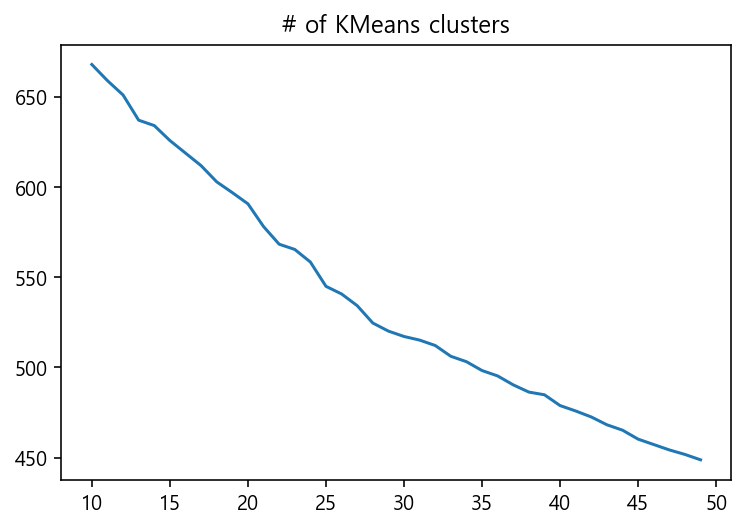

In [153]:
plt.plot(range(start,end), inertia)
plt.title("# of KMeans clusters") # y is inertia value - ?

In [157]:
n_clusters = 20
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict
df["cluster"].value_counts().head(10)

0     919
6      16
18     13
11     10
2       5
12      3
10      3
9       3
14      3
15      2
Name: cluster, dtype: int64

In [167]:
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state =42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████| 40/40 [00:02<00:00, 18.50it/s]


Text(0.5, 1.0, '# of KMeans clusters')

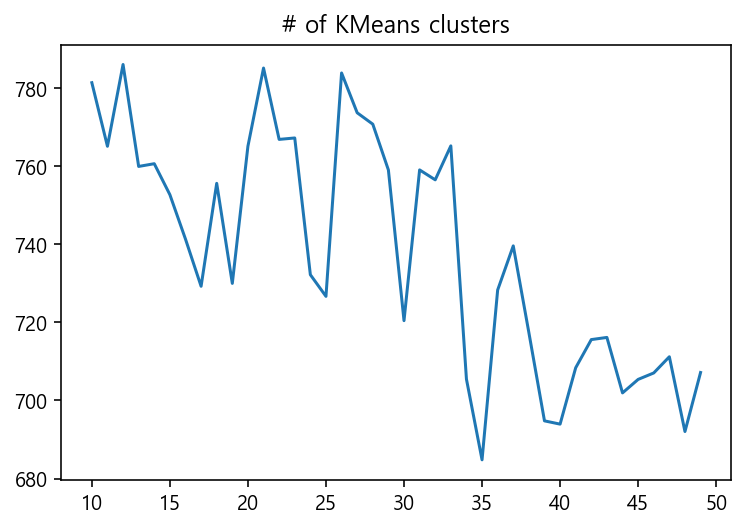

In [168]:
plt.plot(range(start,end), b_inertia)
plt.title("# of KMeans clusters")

In [169]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"] = predict
df["bcluster"].value_counts().head(10)

17    617
2     247
1      28
3      28
12     11
8      11
0      10
16      8
6       8
10      6
Name: bcluster, dtype: int64

In [171]:
df[df["bcluster"] == 8].head(5)

,text,origin_text,감동,사랑,죽음,울,할머니,아이,노래,픽사,추억,눈물,cluster,bcluster
14,진짜 픽사영화를 보면 인생이 뭔지 다시 생각하게 된다,진짜 픽사영화를 보면 인생이 뭔지 다시 생각하게 된다,False,False,False,False,False,False,False,True,False,False,0,8
43,가족이 무엇인지 다시 생각하게 해주는 영화..아이들은 1도 안우는데 나만 눈물바다된...,관람객가족이 무엇인지 다시 생각하게 해주는 영화..아이들은 1도 안우는데 나만 눈물...,False,False,False,False,False,True,False,False,False,True,0,8
366,아 그냥 진짜 최고다... 애니메이션 보면서 이렇게 울어본 적이 없는데ㅠㅠ 너무 감...,아 그냥 진짜 최고다... 애니메이션 보면서 이렇게 울어본 적이 없는데ㅠㅠ 너무 감...,True,False,False,True,False,False,False,False,False,False,0,8
389,사십중반에 애니메이션 보면서 울었다,사십중반에 애니메이션 보면서 울었다,False,False,False,True,False,False,False,False,False,False,0,8
416,펑펑 울었네요 너무 감동적이에요,펑펑 울었네요 너무 감동적이에요,True,False,False,True,False,False,False,False,False,False,0,8


In [181]:
df.loc[df["cluster"]==6, ["bcluster", "cluster", "text"]]

,bcluster,cluster,text
3,13,6,사람이 진정으로 죽는 순간은 사랑하는 사람에게 잊혀졌을때..사랑하는 사람들을 영원히...
8,2,6,remember me... 내가 나중에 죽는다면 사후세계에 갔을때 울엄마아빠가 나 ...
130,2,6,이 영화 진짜 겨울왕국 주토피아 모아나를 이을 디즈니의 걸작입니다! 끝에 remem...
193,2,6,remember me
396,2,6,마마코코처럼 우리할머니도 어느덧 90살을 훌쩍넘어 이별을 준비해야하는 순간이 매 시...
399,2,6,remember me
435,2,6,코코할머니하고 'remember me'노래부르는 장면을 볼때마다 눈물이 나네요..정...
508,2,6,remember me~~ 가 아직도 귓가에 맴돌아요!!
544,2,6,remember me..
685,3,6,"마지막에 remember me 노래 부를 때 울컥했네요. 영상미도 좋고, 노래가 특..."
